<a href="https://colab.research.google.com/github/l-e13/covidproject/blob/main/SCRIPTS/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Script Name:** Analysis.ipynb


**Project:** COVID-19 Twitter Sentiment Analysis

**Description:**
This script analyzes sentiment trends in COVID-19-related tweets using the VADER sentiment analysis tool. It compares sentiment scores on March 16, 2020, and April 5, 2020, performs statistical testing, and visualizes results.

Dependencies:
- google colab (for mounting google drive to pull data)
- pandas
- seaborn
- matplotlib
- scipy.stats

**Usage:**
This script should be executed using the `df_us_with_sentiment.csv`.

In [1]:
# PROMPTS USER TO UPLOAD df_us_with_sentiment.csv FILE

from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Get the file name (first key in the uploaded dictionary)
file_name = list(uploaded.keys())[0]

# Load the CSV file
df = pd.read_csv(file_name, encoding='ISO-8859-1')

# Display first few rows
df.head()

Saving df_us_with_sentiment.csv to df_us_with_sentiment.csv


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,VADER Score
0,3812,48764,"Chicago, IL",2020-03-16,"Me: I don't need to stock up on food, I'll jus...",Positive,0.3400
1,3814,48766,"Houston, Texas",2020-03-16,Lines at the grocery store have been unpredict...,Positive,0.1901
2,3818,48770,"Denver, CO",2020-03-16,"For those who aren't struggling, please consid...",Positive,0.2892
3,3825,48777,"Ketchum, Idaho",2020-03-16,In preparation for higher demand and a potenti...,Negative,-0.5423
4,3827,48779,"New York, NY",2020-03-16,Do you see malicious price increases in NYC? T...,Negative,-0.5267


In [3]:
df.dtypes

,0
UserName,int64
ScreenName,int64
Location,object
TweetAt,object
OriginalTweet,object
Sentiment,object
VADER Score,float64


In [ ]:
# Extract tweets from March 16 and April 5
df_selected_dates = df[df['TweetAt'].isin(['2020-03-16', '2020-04-05'])]

# Display the first few rows to verify
print(df_selected_dates[['TweetAt', 'OriginalTweet', 'VADER Score', 'Sentiment']].head())

      TweetAt                                      OriginalTweet  VADER Score  \
0  2020-03-16  Me: I don't need to stock up on food, I'll jus...       0.3400   
1  2020-03-16  Lines at the grocery store have been unpredict...       0.1901   
2  2020-03-16  For those who aren't struggling, please consid...       0.2892   
3  2020-03-16  In preparation for higher demand and a potenti...      -0.5423   
4  2020-03-16  Do you see malicious price increases in NYC? T...      -0.5267   

  Sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Negative  
4  Negative  


In [ ]:
# Extract tweets from March 16 and April 5
df_selected_dates = df[df['TweetAt'].isin(['2020-03-16', '2020-04-05'])]

# Group by date and calculate average sentiment score
sentiment_summary = df_selected_dates.groupby('TweetAt')['VADER Score'].mean().reset_index()

# Display the results
print(sentiment_summary)

      TweetAt  VADER Score
0  2020-03-16     0.018434
1  2020-04-05     0.089443


**Bar Plot Comparing March 16 to April 5**

<ipython-input-5-3de79c6ac4db>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_summary['TweetAt'], y=sentiment_summary['VADER Score'], palette="coolwarm")


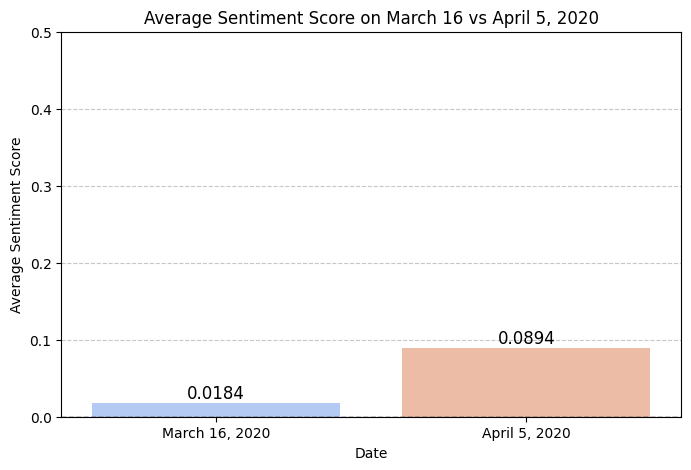

In [ ]:

# barplot comparing march 16 to april 5

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=sentiment_summary['TweetAt'], y=sentiment_summary['VADER Score'], palette="coolwarm")

plt.title("Average Sentiment Score on March 16 vs April 5, 2020")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")

# Adjust y-axis limits for better visibility
plt.ylim(0, 0.5)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dashed grid lines on the y-axis

# Define custom x-axis labels
custom_labels = ["March 16, 2020", "April 5, 2020"]
plt.xticks(ticks=[0, 1], labels=custom_labels)  # Manually set tick positions and labels

# Add text labels for exact sentiment scores
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

# Add a neutral reference line
plt.axhline(0, color="black", linestyle="--", linewidth=1)

plt.show()


**Boxplot showing distribution of 3/16/20 and 4/5/20**

<ipython-input-6-612d75e7b161>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TweetAt", y="VADER Score", data=df[df["TweetAt"].isin(["2020-03-16", "2020-04-05"])], palette="coolwarm")


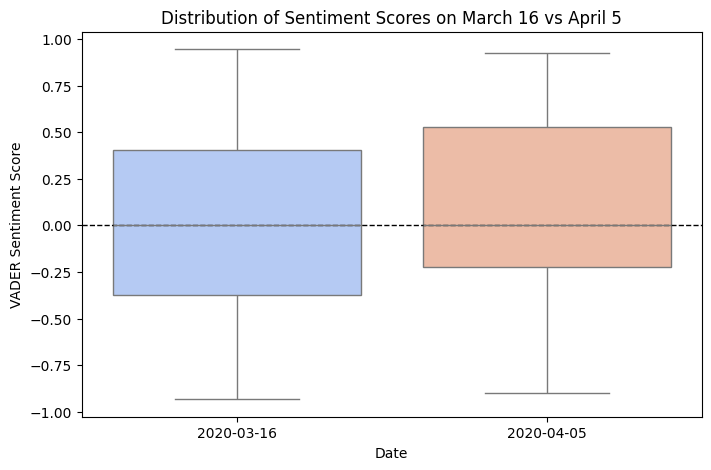

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(8, 5))
sns.boxplot(x="TweetAt", y="VADER Score", data=df[df["TweetAt"].isin(["2020-03-16", "2020-04-05"])], palette="coolwarm")

plt.title("Distribution of Sentiment Scores on March 16 vs April 5")
plt.xlabel("Date")
plt.ylabel("VADER Sentiment Score")
plt.axhline(0, color="black", linestyle="--", linewidth=1)  # Neutral reference line
plt.show()


**Looking at sentiment by location**

<ipython-input-30-e7020f5a7d56>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_march16, y="Location", x="VADER Score", palette=colors_march16)


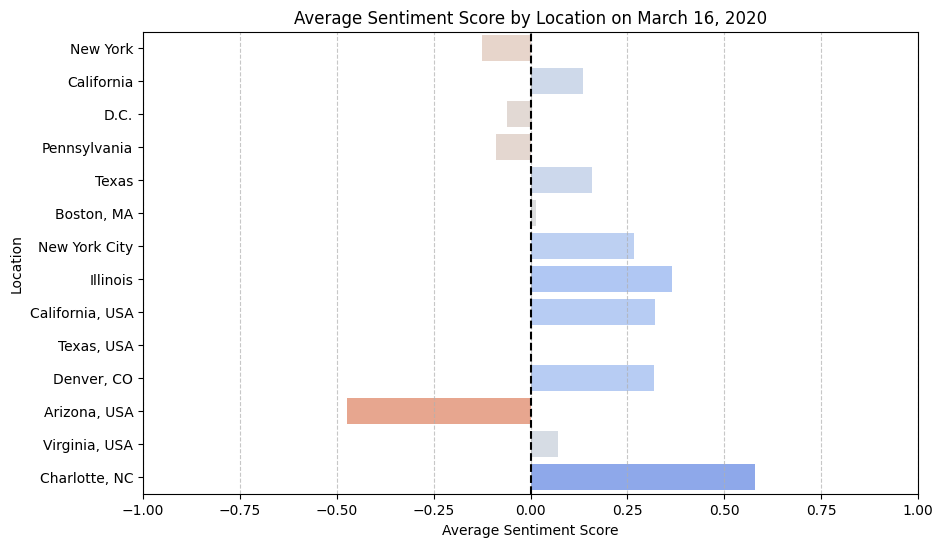

<ipython-input-30-e7020f5a7d56>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_april5, y="Location", x="VADER Score", palette=colors_april5)


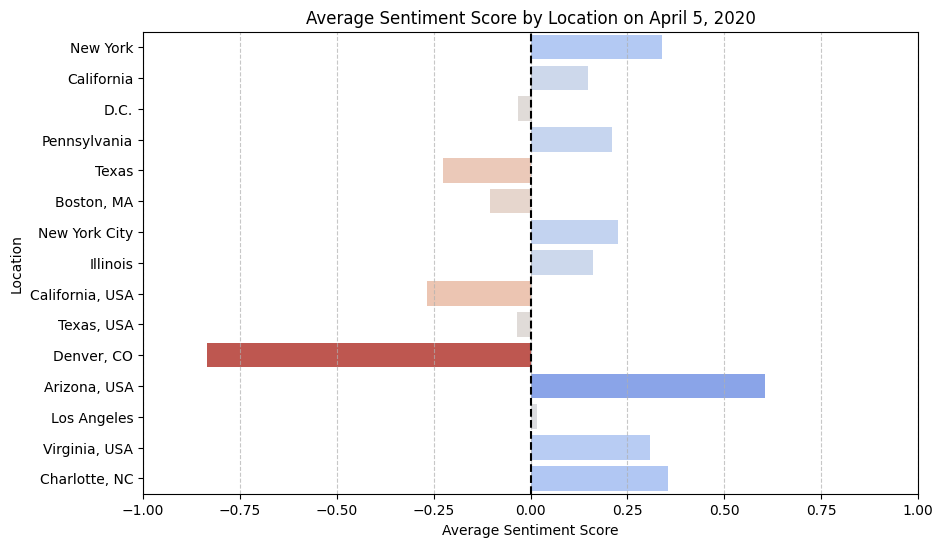

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter tweets for March 16 and April 5
df_march16 = df[df["TweetAt"] == "2020-03-16"]
df_april5 = df[df["TweetAt"] == "2020-04-05"]

# Count total tweets per location across BOTH dates
top_locations = df[df["TweetAt"].isin(["2020-03-16", "2020-04-05"])]["Location"].value_counts().head(15).index

# Group by location and calculate the average sentiment score
sentiment_march16 = df_march16.groupby("Location")["VADER Score"].mean().reset_index()
sentiment_april5 = df_april5.groupby("Location")["VADER Score"].mean().reset_index()

# Filter sentiment data to include only the top 15 locations
sentiment_march16 = sentiment_march16[sentiment_march16["Location"].isin(top_locations)]
sentiment_april5 = sentiment_april5[sentiment_april5["Location"].isin(top_locations)]

# Sort locations in the same order for both plots (using reindex to avoid KeyError)
sentiment_march16 = sentiment_march16.set_index("Location").reindex(top_locations).reset_index()
sentiment_april5 = sentiment_april5.set_index("Location").reindex(top_locations).reset_index()

# Drop rows with NaN values (if any location was missing)
sentiment_march16.dropna(inplace=True)
sentiment_april5.dropna(inplace=True)

# ======= 📊 PLOTTING STARTS =======

# Create a color map from negative (-1) to positive (1) sentiment
cmap = sns.color_palette("coolwarm_r", as_cmap=True)

# Normalize sentiment scores to map them to colors
norm = plt.Normalize(-1, 1)
colors_march16 = [cmap(norm(score)) for score in sentiment_march16["VADER Score"]]
colors_april5 = [cmap(norm(score)) for score in sentiment_april5["VADER Score"]]

## 🔹 1. **Average Sentiment Score on March 16**
plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_march16, y="Location", x="VADER Score", palette=colors_march16)
plt.xlabel("Average Sentiment Score")
plt.ylabel("Location")
plt.title("Average Sentiment Score by Location on March 16, 2020")
plt.axvline(x=0, color="black", linestyle="--")  # Neutral sentiment reference line
plt.xlim(-1, 1)  # VADER scores range from -1 (negative) to 1 (positive)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

## 🔹 2. **Average Sentiment Score on April 5**
plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_april5, y="Location", x="VADER Score", palette=colors_april5)
plt.xlabel("Average Sentiment Score")
plt.ylabel("Location")
plt.title("Average Sentiment Score by Location on April 5, 2020")
plt.axvline(x=0, color="black", linestyle="--")  # Neutral sentiment reference line
plt.xlim(-1, 1)  # VADER scores range from -1 (negative) to 1 (positive)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# ======= 📊 PLOTTING ENDS =======



**Running t-test**

In [ ]:
from scipy.stats import ttest_ind

# Extract sentiment scores for each date
march_16_scores = df[df['TweetAt'] == '2020-03-16']['VADER Score']
april_5_scores = df[df['TweetAt'] == '2020-04-05']['VADER Score']

# Perform an independent t-test on the means of March 16 and April 5
t_stat, p_value = ttest_ind(march_16_scores, april_5_scores, equal_var=False)

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Result: The difference in average sentiment scores is statistically significant.")
else:
    print("Result: No significant difference in average sentiment scores between March 16 and April 5.")

T-statistic: -1.2289
P-value: 0.2201
Result: No significant difference in average sentiment scores between March 16 and April 5.
